# GC Log Processing
#### Ellis Brown, 2021

### Specify a log file in the cell for "Path" below, then run all cells to run analysis on the gc log processing.

In [159]:
# Overhead : For development only.
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [171]:
############### TEST SETS ##############################
from scripts import process_log as pl
# Create gc log file by running with the following flags:
# ""-Xlog:gc*,gc+phases=debug:file=FILENAME.log"

test = "c"

if test == "a":
    
    # Set the path to the file we would like to analyze
    pl.setLogPath("datasets/gc.log")
    pl.setLogSchema(1)
    
elif test == "b":
    
    pl.setLogPath("datasets/amzn_workload_4.log")
    pl.setLogSchema(0)
    
elif test == "c":
    
    pl.setLogPath("datasets/FLIGHT_GC.log")
    pl.setLogSchema(0)

### Begin processing log information. Plots data and trends

Total pauses: 9
Max wait: 11.765 ms
Total wait: 80.826 ms
Average wait: 8.9807 ms
Throughput probably: 99.9837%


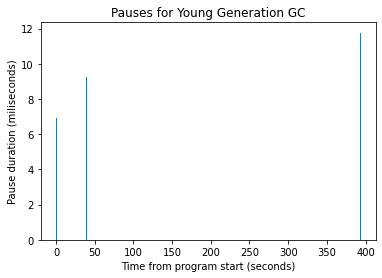

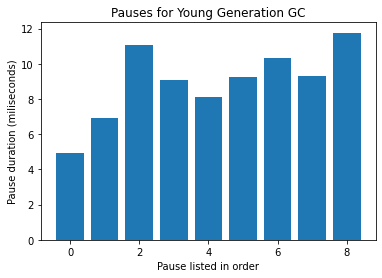

In [161]:
''' Begin processing log information into specific variables '''
from scripts import process_log as pl
from scripts import plot_data as dplt

# Get the pauses information from that file.
table_young_pauses = pl.getPauses(create_csv = False)
if len(table_young_pauses) > 0:
    # plot the data for pauses, printing to output the trends.
    dplt.plot_pauses(table_young_pauses)
else:
    print("No information recorded")

# To inspect more information about this, access the variable "table_ypauses"
# TODO: Transform second table into line graph

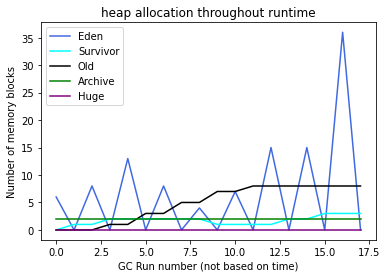

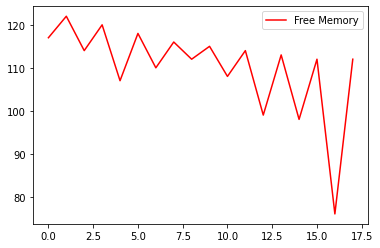

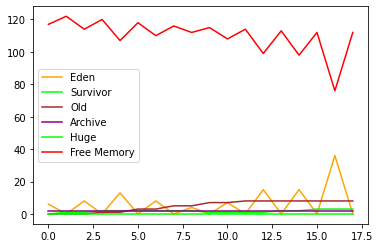

In [162]:
''' Analyze heap allocation througout the program '''
from scripts import process_log as pl
from scripts import plot_data as dplt

#################################################
# IMPORTANT NOTE: THE CURRENT X AXIS IS NOT TIME!! (fix later)
#################################################

heap_allocation_sections = pl.getHeapAllocation(create_csv = False)
if len(heap_allocation_sections) > 0:

    # plot the data for pauses, printing to output the trends.
    dplt.plot_heap_allocation_breakdown(heap_allocation_sections)
else:
    print("No log data collected")

#TODO: Fix formatting of table & color choices


###Below is just testing. Temporary below.

In [182]:
# # Gets heap inital state information as a dictionary. 
# initial_heap_state = pl.getHeapInitialState(create_csv = False)

# # Create graphical table from heap state
# dplt.tableInitialHeapState(initial_heap_state)

##################################################################

# Get all other metadata about the specific gc used
gc_metadata = pl.getGCMetadata(create_csv = False)

# Create graphical table from metadata
dplt.tableMetadata(gc_metadata)

-------------------------------------------------------
Version . . . . . . . . . . .  | 16.0.1+9 (release)
CPUs . . . . . . . . . . . . . | 16 total, 16 available
Memory . . . . . . . . . . . . | 65536M
Large Page Support . . . . . . | Disabled
NUMA Support . . . . . . . . . | Disabled
Compressed Oops . . . . . . .  | Enabled (Zero based)
Heap Region Size . . . . . . . | 8M
Heap Min Capacity . . . . . .  | 8M
Heap Initial Capacity . . . .  | 1G
Heap Max Capacity . . . . . .  | 16G
Pre-touch . . . . . . . . . .  | Disabled
Parallel Workers . . . . . . . | 13
Concurrent Workers . . . . . . | 3
Concurrent Refinement Workers  | 13
Periodic GC . . . . . . . . .  | Disabled
